In [1]:
# SIMPLE LINEAR EGRESSION
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv(r"C:\Users\SURAJ\Downloads\price.csv")
df = df.dropna()
df.head()


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


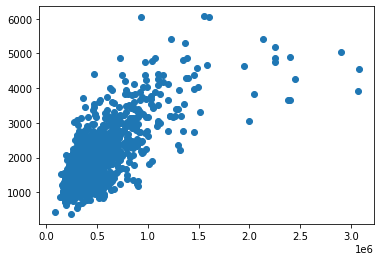

In [16]:
# linearity
new_df = df[["price", 'bedrooms', "sqft_living", "sqft_lot", "floors"]]
plt.scatter(new_df.price ,new_df.sqft_living)

In [3]:
from sklearn.linear_model import LinearRegression as LR
y = new_df[['price']]
x = new_df[['sqft_living']]
model = LR()
model.fit(x, y)


LinearRegression()

In [4]:
model.score(x,y)

0.49661528229119023

In [6]:
y_pred= model.predict(x)
res = y- y_pred

[2.02255627]


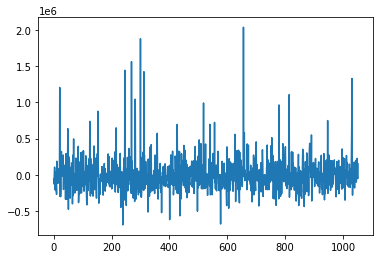

In [8]:
# AUTOOCORRRELATION
from statsmodels.stats.stattools import durbin_watson
plt.plot(res)
print(durbin_watson(res))

In [7]:
# homogeity
import numpy as np
re=np.array(res).flatten()
ype = np.array(y_pred).flatten()

import scipy.stats as stats
stats.levene(re,ype)

LeveneResult(statistic=5.320653709136387, pvalue=0.021170824462411923)

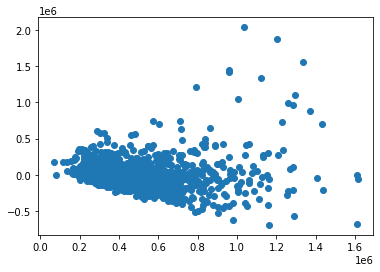

In [9]:
plt.scatter(y_pred, res)

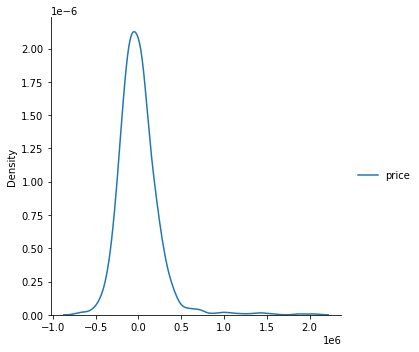

In [10]:
# error normality
sns.displot(res, kind='kde')

1.9865521634259555

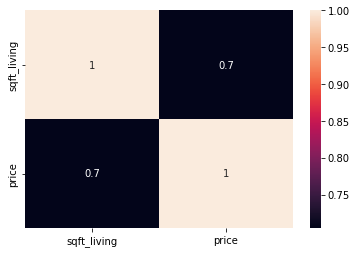

In [13]:
# multicollinearity
sns.heatmap(new_df[["sqft_living", "price"]].corr(), annot=True)

from sklearn.metrics import r2_score
r2 = r2_score(y, y_pred)
VIF = 1/(1-r2)
VIF


In [14]:
import statsmodels.api as sm
x1 = new_df[['sqft_living']]
x = sm.add_constant(x1)
results = sm.OLS(y, x).fit()
results.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.497
Model:                            OLS   Adj. R-squared:                  0.496
Method:                 Least Squares   F-statistic:                     1037.
Date:                Mon, 08 May 2023   Prob (F-statistic):          7.78e-159
Time:                        20:41:10   Log-Likelihood:                -14543.
No. Observations:                1053   AIC:                         2.909e+04
Df Residuals:                    1051   BIC:                         2.910e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -3.463e+04   1.88e+04     -1.845      0.065   -7.15e+04    2194.144
sqft_living   271.7192      8.438     32.200      0.000     255.161     288.277
==============================================================================
Omnibus:                      622.151   Durbin-Watson:                   2.023
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9616.999
Skew:                           2.406   Prob(JB):                         0.00
Kurtosis:                      17.001   Cond. No.                     5.62e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.62e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""